# Scripts to do QC on the rift detectors

## Load saved pickle of atl06 data

In [1]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

dataset_path = '/data/fast0/datasets/'
atl06_path = "/data/fast1/arc/atl06"
output_path = '/data/fast1/arc/rift_obs'


In [2]:
shelf_name = 'amery'

atl06_file_name = os.path.join(atl06_path, shelf_name + '.pkl')

with open(atl06_file_name, 'rb') as handle:
    atl06_data = pickle.load(handle)
atl06_data = pd.DataFrame(atl06_data)

rift_obs_output_file_name = os.path.join(output_path, shelf_name + '.pkl')
with open(rift_obs_output_file_name, 'rb') as handle:
    rift_obs = pickle.load(handle)

## Plot some observations

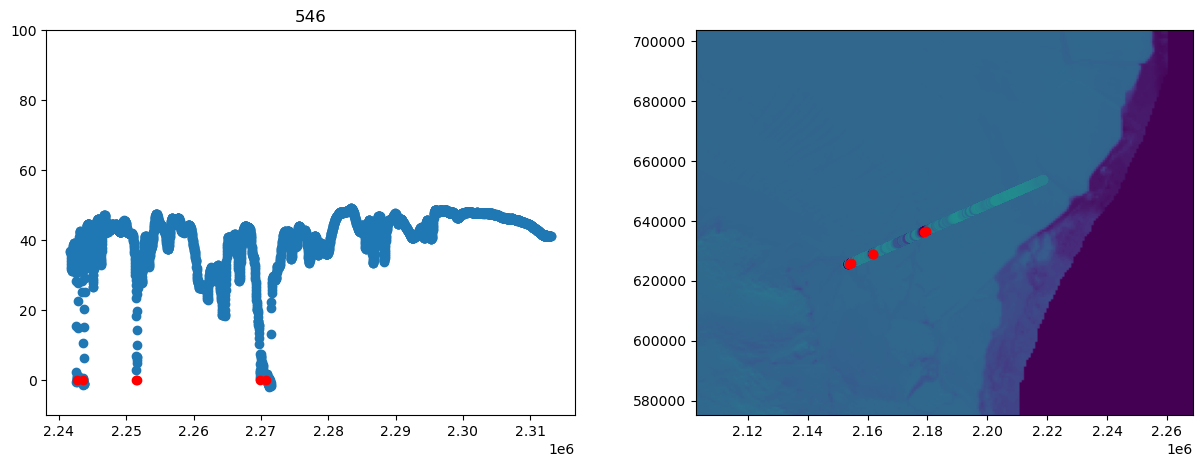

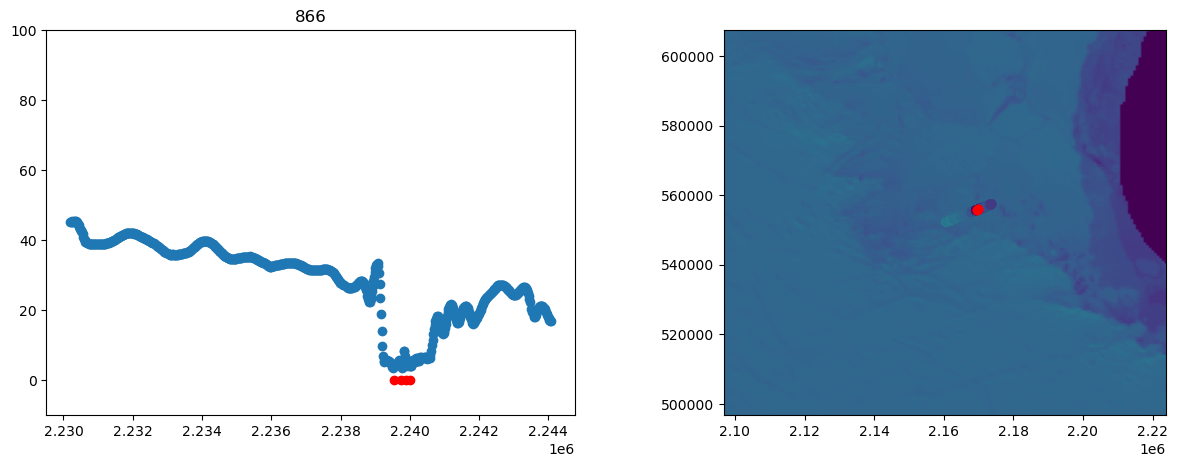

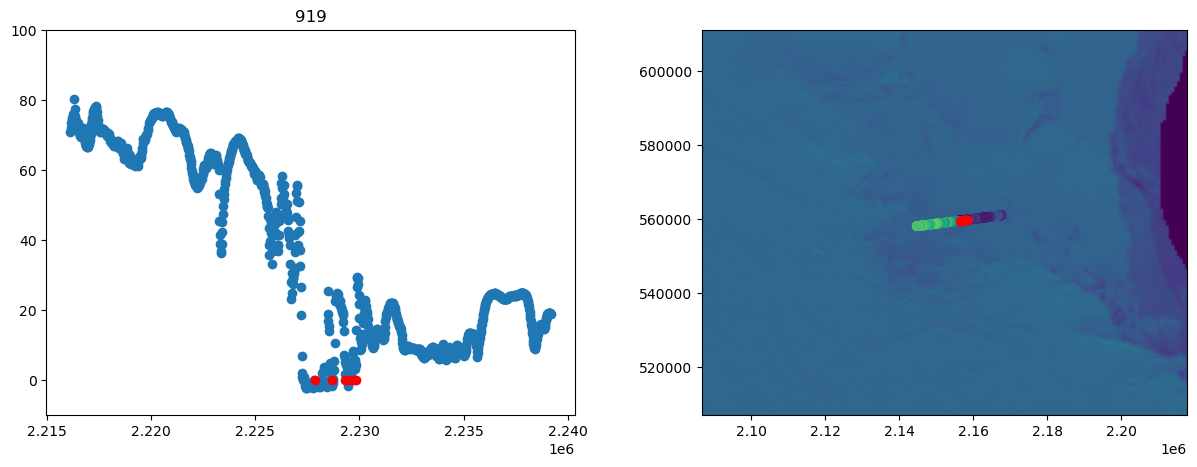

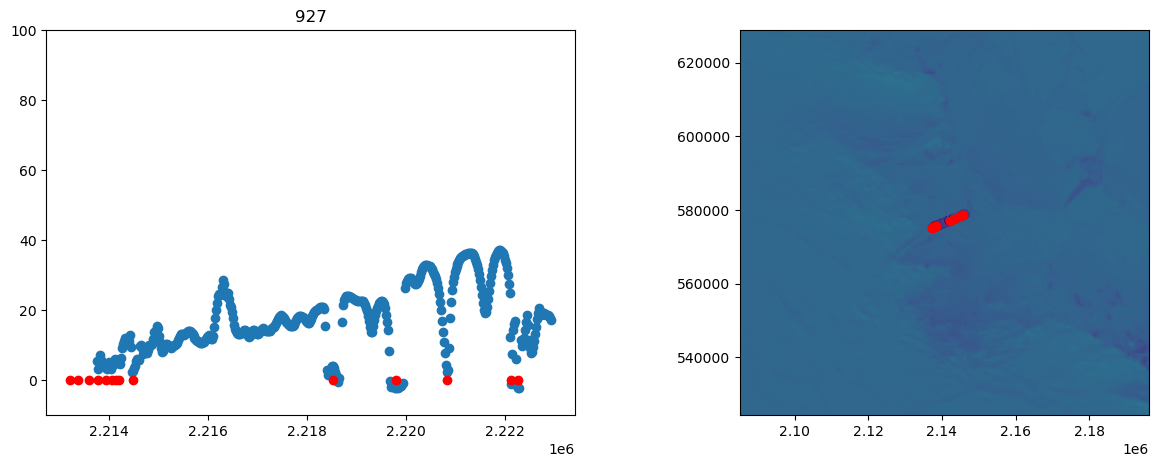

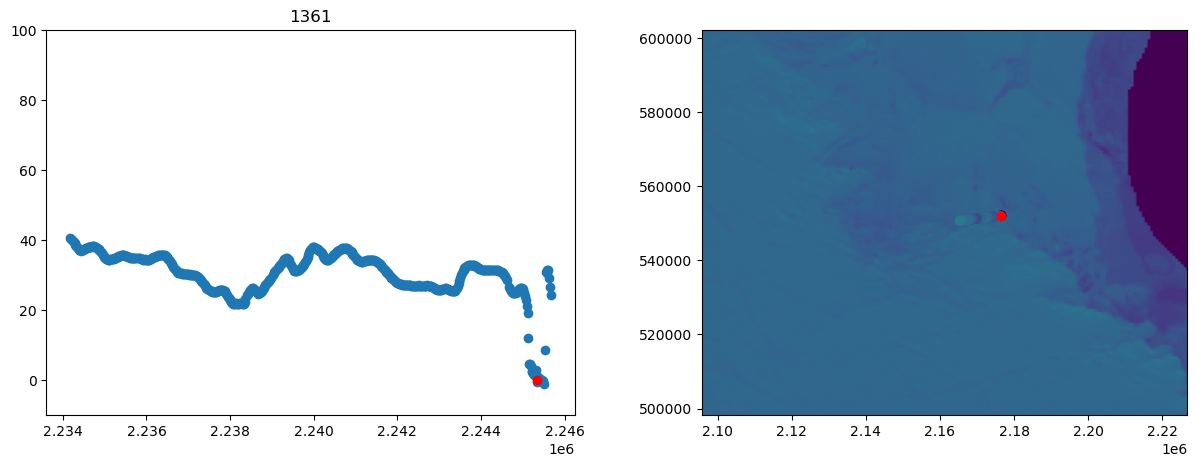

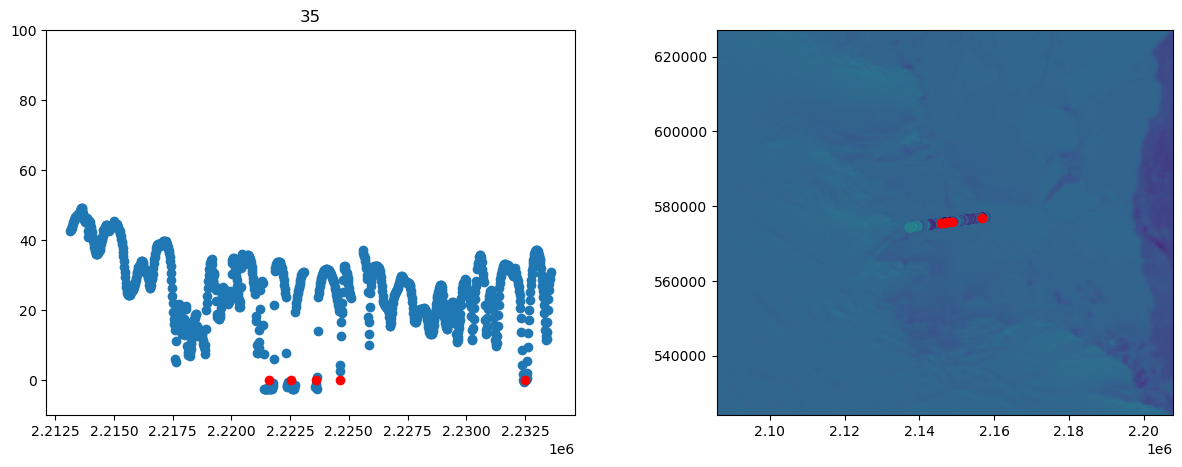

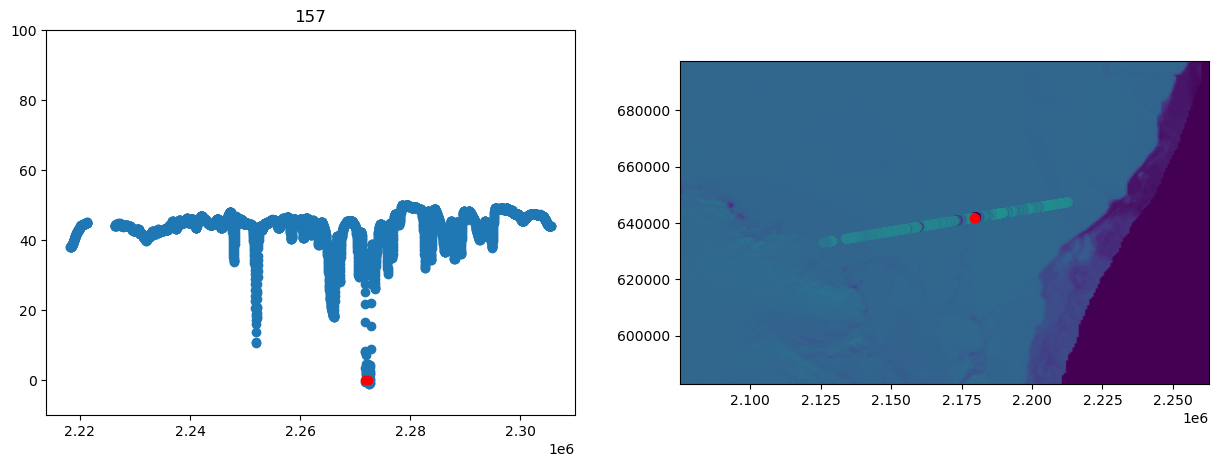

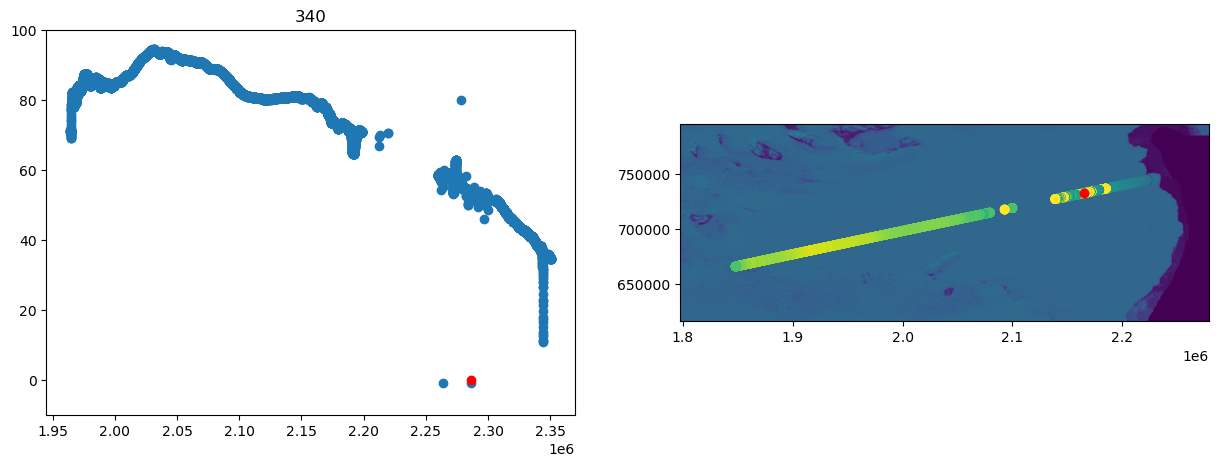

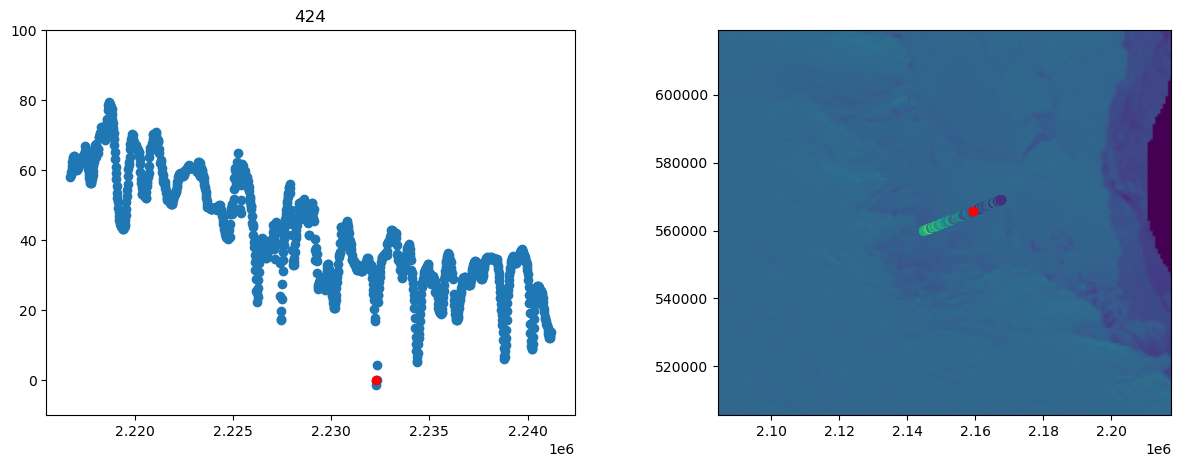

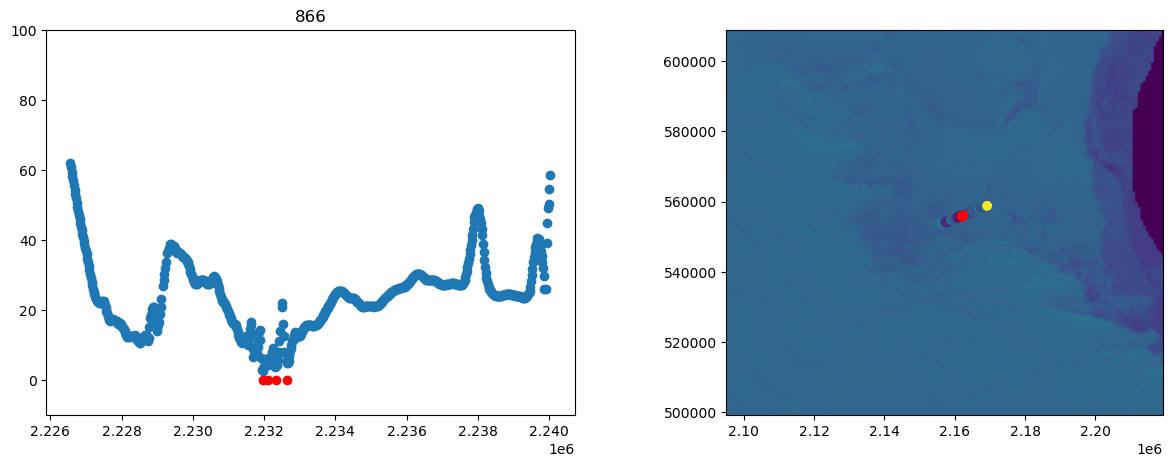

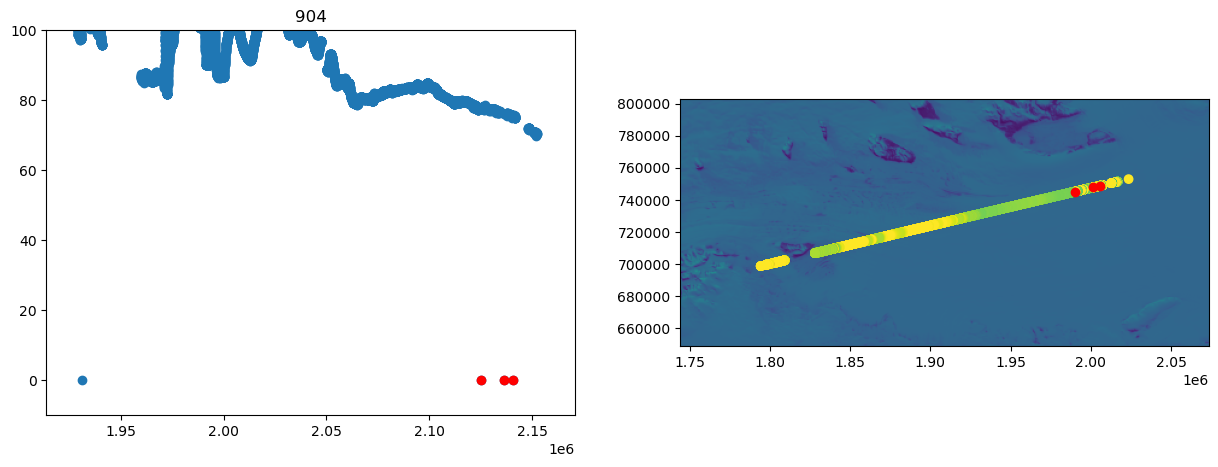

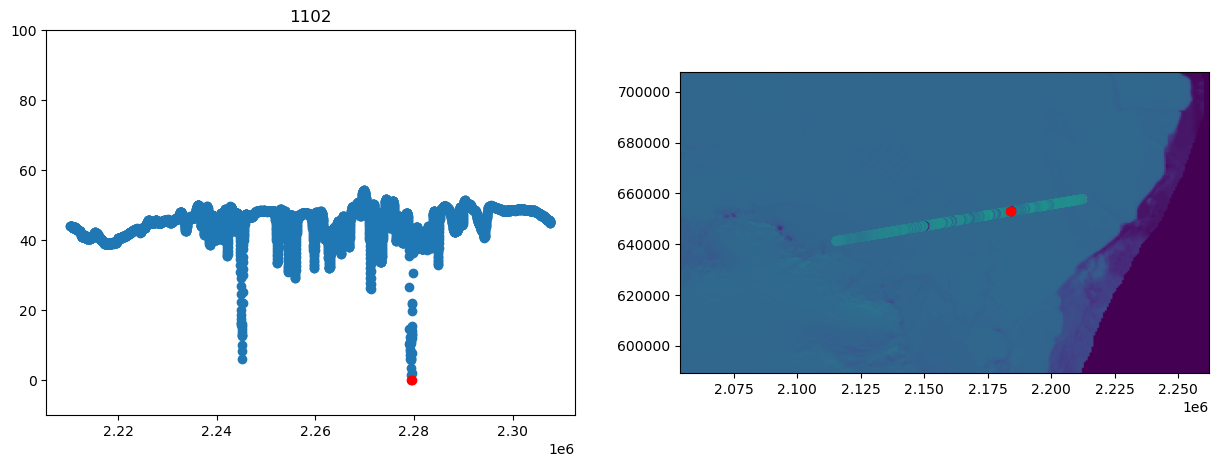

In [6]:
image_file = dataset_path + 'moa750_2014_hp1_v01.tif'
sat_data = rasterio.open(image_file)

for i, row in atl06_data.iterrows():
    
    these_rifts = rift_obs[rift_obs.data_row==i]
    if len(these_rifts)==0:
        continue
        
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))
    d = np.sqrt( row.x**2 + row.y**2 )
    
    ax1.scatter(d,row['h'] - row['geoid'] - row['tides'])
    
    dr = np.sqrt( these_rifts['x-centroid']**2 + these_rifts['y-centroid']**2 )
    ax1.scatter(dr,np.zeros_like(dr),c='r')
    ax1.set_ylim([-10,100])
    ax1.set_title(row.rgt)
    
    show(sat_data,cmap="viridis",ax=ax2)
    ax2.scatter(row['x'],row['y'],c = row['h'] - row['geoid'] - row['tides'],vmin=0,vmax=100)
    ax2.scatter(these_rifts['x-centroid'], these_rifts['y-centroid'],c='r')
    padding = 50e3
    ax2.set_xlim([np.min(row['x'])-padding,np.max(row['x'])+padding])
    ax2.set_ylim([np.min(row['y'])-padding,np.max(row['y'])+padding])
    if i>100:
        break
plt.show()